In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(
    font_scale = 2,
    style='whitegrid',
    rc={'figure.figsize' : (20,7)}
)

# Анализ цен на Avocado Haas в США

In [4]:
avocado_mean = pd.read_csv('C:/Users/mi/Downloads/my_files/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-fazylova-17/Lesson_6/avocado_mean.csv', index_col=0, squeeze=True, parse_dates=['Date'])


### Описание данных
*В датафрейме находятся данные не за каждый день, а за конец каждой недели*

**Date** — дата <br>
**AveragePrice** — средняя цена одного авокадо

In [11]:
avocado_mean.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


#### Проверим данные на ошибки

In [12]:
avocado_mean.describe()

,AveragePrice
count,169.000000
mean,1.405988
std,0.151713
min,1.144722
25%,1.300926
50%,1.385185
75%,1.482315
max,1.871296


In [14]:
avocado_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [15]:
avocado_mean.duplicated().sum()

0

**Вывод** <br>
Дубликатов и нулевых строк в таблице нет. Значения средних цен по дням лежит в диапазоне 1,14-1,87 USD, среднее - 1,41 USD, медианное значение 1,38 USD

### 1. Скользящее среднее цены авокадо

In [58]:
 import matplotlib.dates as mdates

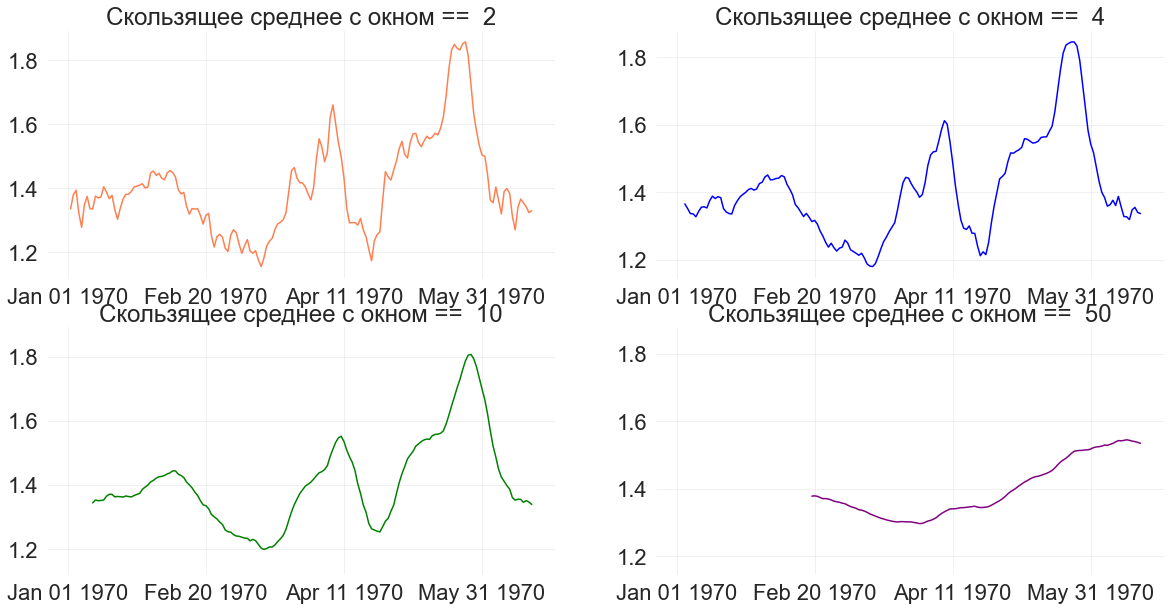

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

windows = [2, 4, 10, 50]
colors = ['coral', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
for ax in axes.flatten():
    ax.set_frame_on(False)  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
for name, ax in zip(['2','4','10','50'], axes.flatten()):
    ax.set(title='Скользящее среднее с окном ==  {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')
plt.show()

<AxesSubplot:>

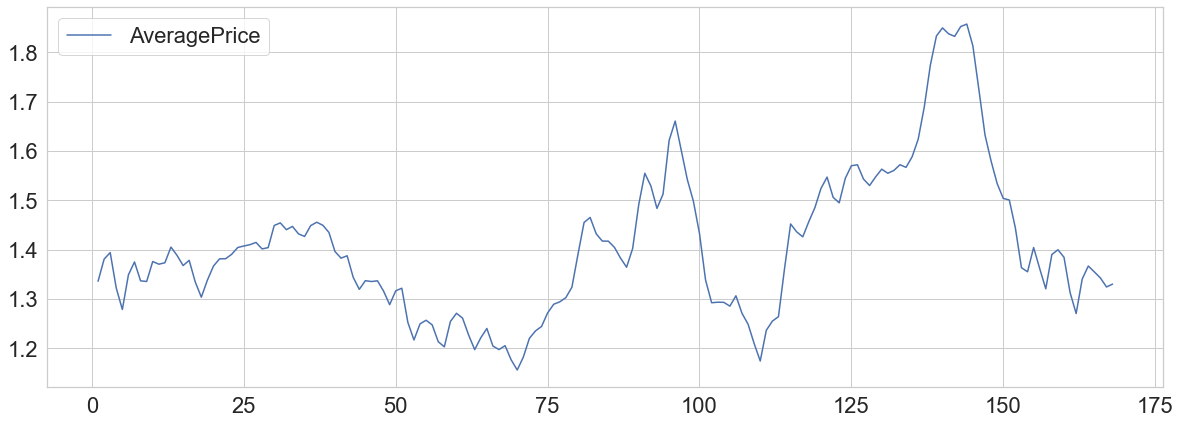

In [37]:
print('Диапазон значений с окном 2 равен',avocado_mean.rolling(2).mean().min().round(2)[0], '-', avocado_mean.rolling(2).mean().max().round(2)[0])

Диапазон значений с окном 2 равен 1.16 - 1.86


**1.2 Окно == 4**

<AxesSubplot:>

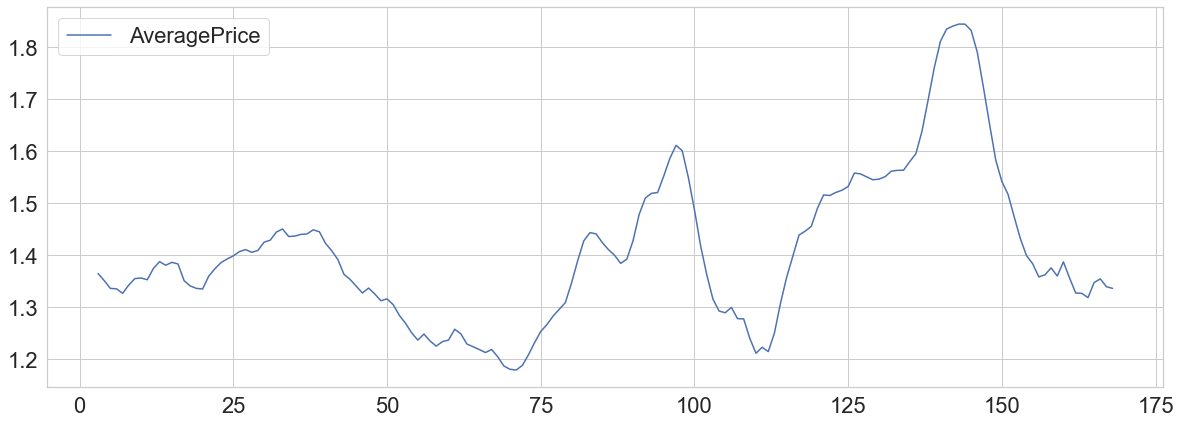

In [29]:
avocado_mean.rolling(4).mean().plot()

In [32]:
print('Наиименьшее значение скользящего среднего равно',avocado_mean.rolling(4).mean().min().round(2)[0])
print('Наибольшее значение скользящего среднего равно',avocado_mean.rolling(4).mean().max().round(2)[0])

Наиименьшее значение скользящего среднего равно 1.18
Наибольшее значение скользящего среднего равно 1.84


**1.3 Окно == 10**

<AxesSubplot:>

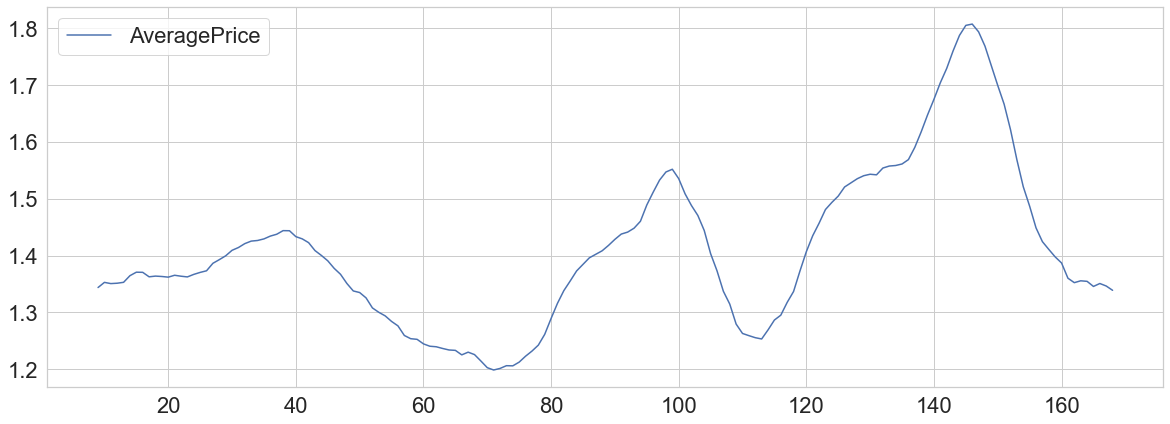

In [33]:
avocado_mean.rolling(10).mean().plot()

In [34]:
print('Наиименьшее значение скользящего среднего равно',avocado_mean.rolling(10).mean().min().round(2)[0])
print('Наибольшее значение скользящего среднего равно',avocado_mean.rolling(10).mean().max().round(2)[0])

Наиименьшее значение скользящего среднего равно 1.2
Наибольшее значение скользящего среднего равно 1.81


**1.3 Окно == 50**

<AxesSubplot:>

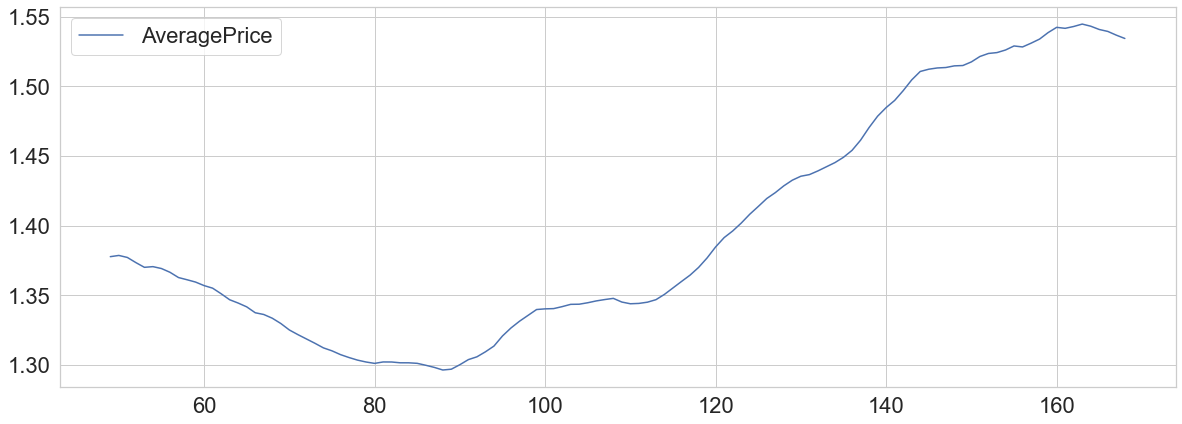

In [35]:
avocado_mean.rolling(50).mean().plot()

In [36]:
print('Наиименьшее значение скользящего среднего равно',avocado_mean.rolling(50).mean().min().round(2)[0])
print('Наибольшее значение скользящего среднего равно',avocado_mean.rolling(50).mean().max().round(2)[0])

Наиименьшее значение скользящего среднего равно 1.3
Наибольшее значение скользящего среднего равно 1.54
